<a href="https://colab.research.google.com/github/CodewithTanzeel/BlackByte-ML/blob/main/telco_model_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv("telco_encoded.csv")
df.head()


Saving telco_encoded.csv to telco_encoded.csv


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,PaperlessBilling_encoded,Churn_encoded,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,True,False,False,True,False,False,False,False,True,False
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,True,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,0,0,1,1,1,...,True,False,False,True,False,False,False,False,False,True
3,0,45,42.30,1840.75,1,0,0,0,0,0,...,True,False,False,False,True,False,True,False,False,False
4,0,2,70.70,151.65,0,0,0,1,1,1,...,True,False,False,True,False,False,False,False,True,False


from matplotlib import pyplot as plt
_df_0['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['TotalCharges'].plot(kind='hist', bins=20, title='TotalCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['gender_encoded'].plot(kind='hist', bins=20, title='gender_encoded')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('MultipleLines_No').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('MultipleLines_No phone service').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('InternetService_DSL').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('InternetService_Fiber optic').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='MonthlyCharges', y='TotalCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='TotalCharges', y='gender_encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='gender_encoded', y='Partner_encoded', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MultipleLines_No')):
  _plot_series(series, series_name, i)
  fig.legend(title='MultipleLines_No', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_13.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('MultipleLines_No phone service')):
  _plot_series(series, series_name, i)
  fig.legend(title='MultipleLines_No phone service', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InternetService_DSL')):
  _plot_series(series, series_name, i)
  fig.legend(title='InternetService_DSL', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['SeniorCitizen']
  ys = series['tenure']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('SeniorCitizen', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('InternetService_Fiber optic')):
  _plot_series(series, series_name, i)
  fig.legend(title='InternetService_Fiber optic', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('SeniorCitizen')
_ = plt.ylabel('tenure')

from matplotlib import pyplot as plt
_df_16['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_18['TotalCharges'].plot(kind='line', figsize=(8, 4), title='TotalCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_19['gender_encoded'].plot(kind='line', figsize=(8, 4), title='gender_encoded')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['MultipleLines_No phone service'].value_counts()
    for x_label, grp in _df_20.groupby('MultipleLines_No')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MultipleLines_No')
_ = plt.ylabel('MultipleLines_No phone service')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['InternetService_DSL'].value_counts()
    for x_label, grp in _df_21.groupby('MultipleLines_No phone service')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('MultipleLines_No phone service')
_ = plt.ylabel('InternetService_DSL')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['InternetService_Fiber optic'].value_counts()
    for x_label, grp in _df_22.groupby('InternetService_DSL')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('InternetService_DSL')
_ = plt.ylabel('InternetService_Fiber optic')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['OnlineSecurity_No'].value_counts()
    for x_label, grp in _df_23.groupby('InternetService_Fiber optic')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('InternetService_Fiber optic')
_ = plt.ylabel('OnlineSecurity_No')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_24['MultipleLines_No'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_24, x='tenure', y='MultipleLines_No', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_25['MultipleLines_No phone service'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_25, x='tenure', y='MultipleLines_No phone service', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['InternetService_DSL'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='tenure', y='InternetService_DSL', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['InternetService_Fiber optic'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='tenure', y='InternetService_Fiber optic', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
X = df.drop("Churn_encoded", axis=1)
y = df["Churn_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000), # Increased max_iter
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

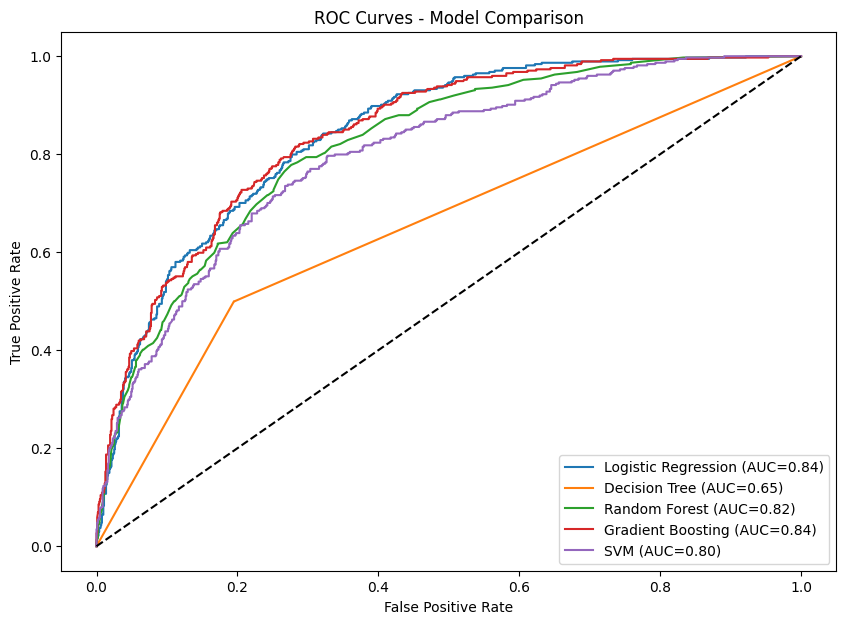

In [ ]:
results = []
plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_prob)

    results.append([name, acc, prec, rec, f1, auc])

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Model Comparison")
plt.legend()
plt.show()


In [ ]:
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score", "AUC"])
df_results = df_results.set_index("Model")
display(df_results)

best_model_name = df_results["AUC"].idxmax()
print("Best model by AUC:", best_model_name)


,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Logistic Regression,0.803407,0.652997,0.553476,0.599132,0.842515
Decision Tree,0.726757,0.485255,0.483957,0.484605,0.648976
Random Forest,0.785664,0.620000,0.497326,0.551929,0.821724
Gradient Boosting,0.804826,0.670103,0.521390,0.586466,0.843248
SVM,0.734564,0.000000,0.000000,0.000000,0.798884


Best model by AUC: Gradient Boosting


In [ ]:
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)
print("Confusion Matrix (rows=true, cols=pred):")
print(cm)


Confusion Matrix (rows=true, cols=pred):
[[939  96]
 [179 195]]


Top 15 features by Random Forest importance:


,0
TotalCharges,0.172237
MonthlyCharges,0.146799
tenure,0.141682
Contract_Month-to-month,0.055017
OnlineSecurity_No,0.034012
PaymentMethod_Electronic check,0.029546
TechSupport_No,0.029130
gender_encoded,0.028371
InternetService_Fiber optic,0.028041
PaperlessBilling_encoded,0.025899


Top 15 features by Permutation Importance:


,0
TotalCharges,0.008978
tenure,0.007488
SeniorCitizen,0.002981
Contract_Month-to-month,0.002661
InternetService_DSL,0.001810
Partner_encoded,0.001313
InternetService_Fiber optic,0.000674
TechSupport_No internet service,0.000568
MultipleLines_No phone service,0.000035
OnlineSecurity_No internet service,-0.000071


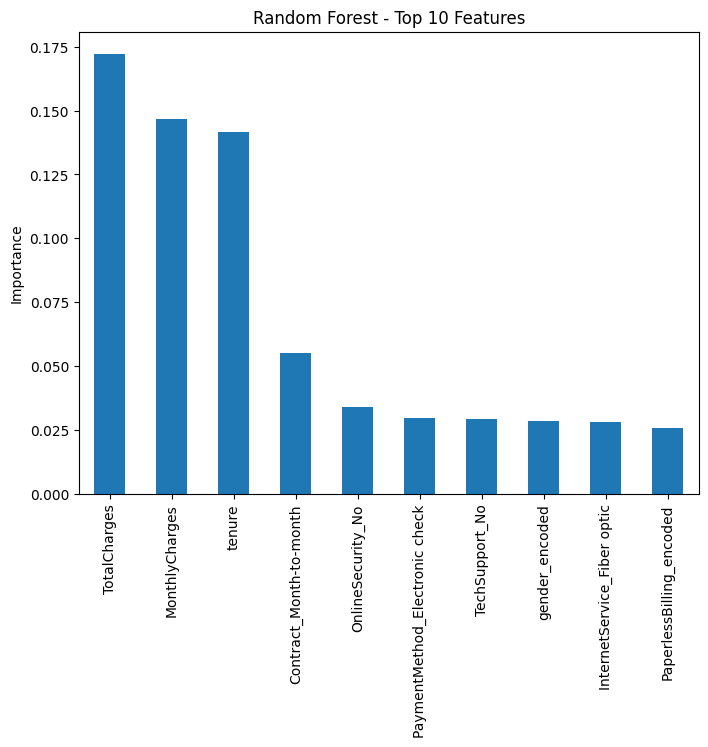

In [ ]:
rf = models["Random Forest"]
importances = rf.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("Top 15 features by Random Forest importance:")
display(feat_imp.head(15))

perm = permutation_importance(rf, X_test, y_test, n_repeats=20, random_state=42)
perm_imp = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
print("Top 15 features by Permutation Importance:")
display(perm_imp.head(15))

plt.figure(figsize=(8, 6))
feat_imp.head(10).plot(kind="bar")
plt.title("Random Forest - Top 10 Features")
plt.ylabel("Importance")
plt.show()
